In [1]:
%load_ext autoreload
%autoreload 2

# xweights' example notebook

This notbook shows some examples how to use xweights. We want to calculate time series of spatial averages.

## 1) Read input data

In the first step, read the input data from disk and create a dataset dictionary. The values of the dataset dictionary are the xarray DataSets read from the input, the keys denote the corresponding dataset names. If you have enough computational ressources you can use large intake-esm catalogue files as input too.

In [2]:
import xweights as xw
import xarray as xr

In [3]:
netcdffile = "tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon_200601-201012.nc"

In [4]:
ds = xr.open_dataset(netcdffile)
dataset_dict = {"tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon": ds}

In [5]:
for name, ds in dataset_dict.items():
    break
ds

<xarray.Dataset>
Dimensions:       (rlon: 424, rlat: 412, time: 60, bnds: 2, vertices: 4)
Coordinates:
  * rlon          (rlon) float64 -28.38 -28.26 -28.16 ... 17.93 18.05 18.16
  * rlat          (rlat) float64 -23.38 -23.26 -23.16 ... 21.61 21.73 21.83
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
    height        float64 ...
Dimensions without coordinates: bnds, vertices
Data variables:
    rotated_pole  |S1 ...
    tas           (time, rlat, rlon) float32 ...
    time_bnds     (time, bnds) object ...
    lon_vertices  (rlat, rlon, vertices) float64 ...
    lat_vertices  (rlat, rlon, vertices) float64 ...
Attributes: (12/23)
    contact:                        klima.projektionen@dwd.de
    CORDEX_domain:                  EUR-11
    institute_id:                   CLMcom
    institution:                    CLMcom, Climate Limited-area Modelling Co...
    driving_model_id:               MIROC-MIROC5
    driving_experiment_name:        rcp85
    ...                             ...
    policy:                         The Deutscher Wetterdienst (DWD) is the p...
    project_id:                     CORDEX
    product:                        output
    frequency:                      mon
    tracking_id:                    490ab140-e096-11e7-b22c-81c28a935756
    creation_date:                  2017-12-14T07:16:13Z

## 2) Get some xweights information

xweights contains some pre-defined regions. Each region contains a geopandas GeoDataFrmae with several geometries. The pre-defined regions are the following:

In [6]:
xw.which_regions()

{'counties': 'Counties (Landkreise) from Germany.',
 'counties_merged': 'Counties (Landkreise) from Germany (merged less than 400m2)',
 'states': 'States (Bundesländer) from Germany',
 'prudence': 'PRUDENCE regions',
 'ipcc': 'AR6-IPCC-WGI Ref. Regions v4'}

In [7]:
xw.which_subregions("states")

{'states': ['02_Hamburg',
  '03_Niedersachsen',
  '04_Bremen',
  '05_Nordrhein-Westfalen',
  '06_Hessen',
  '07_Rheinland-Pfalz',
  '08_Baden-Württemberg',
  '09_Bayern',
  '10_Saarland',
  '11_Berlin',
  '12_Brandenburg',
  '13_Mecklenburg-Vorpommern',
  '14_Sachsen',
  '15_Sachsen-Anhalt',
  '16_Thüringen',
  '01_Schleswig-Holstein']}

In [8]:
xw.which_subregions("counties")

{'counties': ['01001_Flensburg',
  '01002_Kiel',
  '01003_Lübeck',
  '01004_Neumünster',
  '01051_Dithmarschen',
  '01053_Herzogtum Lauenburg',
  '01054_Nordfriesland',
  '01055_Ostholstein',
  '01057_Plön',
  '01058_Rendsburg-Eckernförde',
  '01059_Schleswig-Flensburg',
  '01060_Segeberg',
  '01061_Steinburg',
  '01062_Stormarn',
  '02000_Hamburg',
  '03101_Braunschweig',
  '03102_Salzgitter',
  '03103_Wolfsburg',
  '03151_Gifhorn',
  '03159_Göttingen',
  '03153_Goslar',
  '03154_Helmstedt',
  '03155_Northeim',
  '03157_Peine',
  '03158_Wolfenbüttel',
  '03241_Region Hannover',
  '03251_Diepholz',
  '03252_Hameln-Pyrmont',
  '03254_Hildesheim',
  '03255_Holzminden',
  '01056_Pinneberg',
  '03256_Nienburg (Weser)',
  '03257_Schaumburg',
  '03351_Celle',
  '03352_Cuxhaven',
  '03353_Harburg',
  '03354_Lüchow-Dannenberg',
  '03355_Lüneburg',
  '03356_Osterholz',
  '03357_Rotenburg (Wümme)',
  '03358_Heidekreis',
  '03359_Stade',
  '03360_Uelzen',
  '03361_Verden',
  '03401_Delmenhorst',


In [9]:
xw.which_subregions("counties_merged")

{'counties_merged': ['01001_Flensburg',
  '01002_Kiel',
  '01003_Lübeck',
  '01004_Neumünster',
  '01051_Dithmarschen',
  '01053_Herzogtum Lauenburg',
  '01054_Nordfriesland',
  '01055_Ostholstein',
  '01057_Plön',
  '01058_Rendsburg-Eckernförde',
  '01059_Schleswig-Flensburg',
  '01060_Segeberg',
  '01061_Steinburg',
  '01062_Stormarn',
  '02000_Hamburg',
  '03101_Braunschweig',
  '03102_Salzgitter',
  '03103_Wolfsburg',
  '03151_Gifhorn',
  '03159_Göttingen',
  '03153_Goslar',
  '03154_Helmstedt',
  '03155_Northeim',
  '03157_Peine',
  '03158_Wolfenbüttel',
  '03241_Region Hannover',
  '03251_Diepholz',
  '03252_Hameln-Pyrmont',
  '03254_Hildesheim',
  '03255_Holzminden',
  '01056_Pinneberg',
  '03256_Nienburg (Weser)',
  '03257_Schaumburg',
  '03351_Celle',
  '03352_Cuxhaven',
  '03353_Harburg',
  '03354_Lüchow-Dannenberg',
  '03355_Lüneburg',
  '03356_Osterholz',
  '03357_Rotenburg (Wümme)',
  '03358_Heidekreis',
  '03359_Stade',
  '03360_Uelzen',
  '03361_Verden',
  '03401_Delmenh

In [10]:
xw.which_subregions("prudence")

{'prudence': ['Iberian Peninsula',
  'France',
  'Mid-Europe',
  'Alps',
  'Mediterranean',
  'Eastern Europe',
  'Northwestern Africa',
  'Middle East',
  'Scandinavia',
  'British Isles']}

In [11]:
xw.which_subregions("ipcc")

{'ipcc': ['GIC',
  'NWN',
  'NEN',
  'WNA',
  'CNA',
  'ENA',
  'NCA',
  'SCA',
  'CAR',
  'NWS',
  'NSA',
  'NES',
  'SAM',
  'SWS',
  'SES',
  'SSA',
  'NEU',
  'WCE',
  'EEU',
  'MED',
  'SAH',
  'WAF',
  'CAF',
  'NEAF',
  'SEAF',
  'WSAF',
  'ESAF',
  'MDG',
  'RAR',
  'WSB',
  'ESB',
  'RFE',
  'WCA',
  'ECA',
  'TIB',
  'EAS',
  'ARP',
  'SAS',
  'SEA',
  'NAU',
  'CAU',
  'EAU',
  'SAU',
  'NZ',
  'EAN',
  'WAN',
  'ARO',
  'NPO',
  'EPO',
  'SPO',
  'NAO',
  'EAO',
  'SAO',
  'ARS',
  'BOB',
  'EIO',
  'SIO',
  'SOO']}

## 3) Choose a region 

Now, let's focus on German 'Bundesländer'. We read in the data as geopandas GeoDataFrame.

<Axes: >

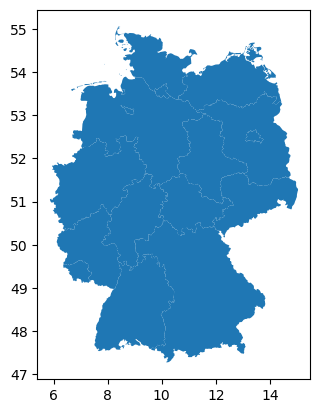

In [12]:
bdl = xw.get_region("states")
bdl.plot()

Of course, you can select singel geometries. Let's take Schleswig-Holstein, Hamburg, Bremen and Lower Saxony.

<Axes: >

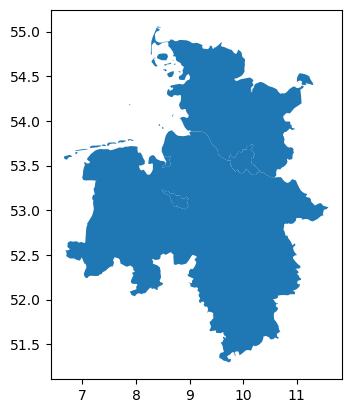

In [13]:
bdl_sub = xw.get_region(
    "states",
    name=["01_Schleswig-Holstein", "02_Hamburg", "03_Niedersachsen", "04_Bremen"],
)
bdl_sub.plot()

Now, we combine those four geometries to one new geometry called 'NothSeaCoast'

<Axes: >

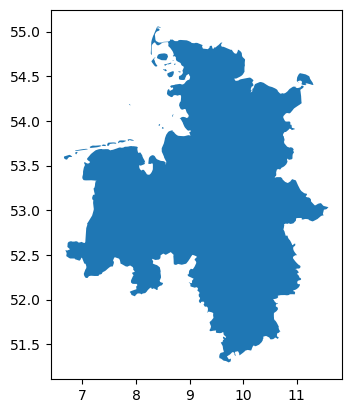

In [14]:
nsc = xw.get_region(
    "states",
    name=["01_Schleswig-Holstein", "02_Hamburg", "03_Niedersachsen", "04_Bremen"],
    merge=["all", "NothSeaCoast"],
)
nsc.plot()

You can read your own shapefile as region file. Then, you have to specify a column name. This column name helps xweights to differentiate the shp file. The example shpfile contains geometries of Neusiedel am See, a small town in Austria.

In [15]:
shpfile = "Seewinkel_map/Seewinkel.shp"

<Axes: >

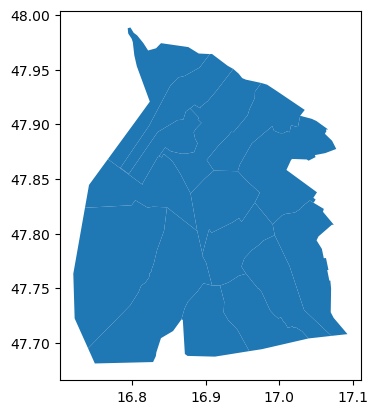

In [16]:
custom = xw.get_region(shpfile, column="VA")
custom.plot()

Here again, you can merge all this small geometries.

<Axes: >

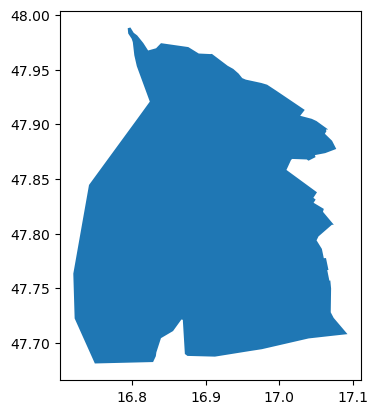

In [17]:
custom = xw.get_region(shpfile, column="VA", merge="VA")
custom.plot()

## 4) Calculate a time series of patial averages

Now, we can calculate a time series of spatial averages using a xarray dataset and geopandas GeoDataFrame.

Here for all 'Bundesländer':

In [18]:
out_bdl = xw.spatial_averaging(ds, bdl)
out_bdl

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


<xarray.Dataset>
Dimensions:       (time: 60, geom: 16, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 2.0
    lon           (geom) float64 10.01 9.16 8.742 7.562 ... 11.7 11.03 9.811
    lat           (geom) float64 53.55 52.77 53.2 51.48 ... 52.01 50.9 54.18
  * geom          (geom) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
    name          (geom) object '02_Hamburg' ... '01_Schleswig-Holstein'
    nnz           (geom) int64 14 397 12 284 189 172 ... 253 207 162 176 145 158
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 269.1 269.5 269.6 ... 274.3 272.9 275.6
    lon_vertices  (vertices, geom) float64 9.933 9.085 8.655 ... 11.12 9.917
    lat_vertices  (vertices, geom) float64 53.49 52.7 53.14 ... 50.85 54.13
Attributes:
    regrid_method:  conservative

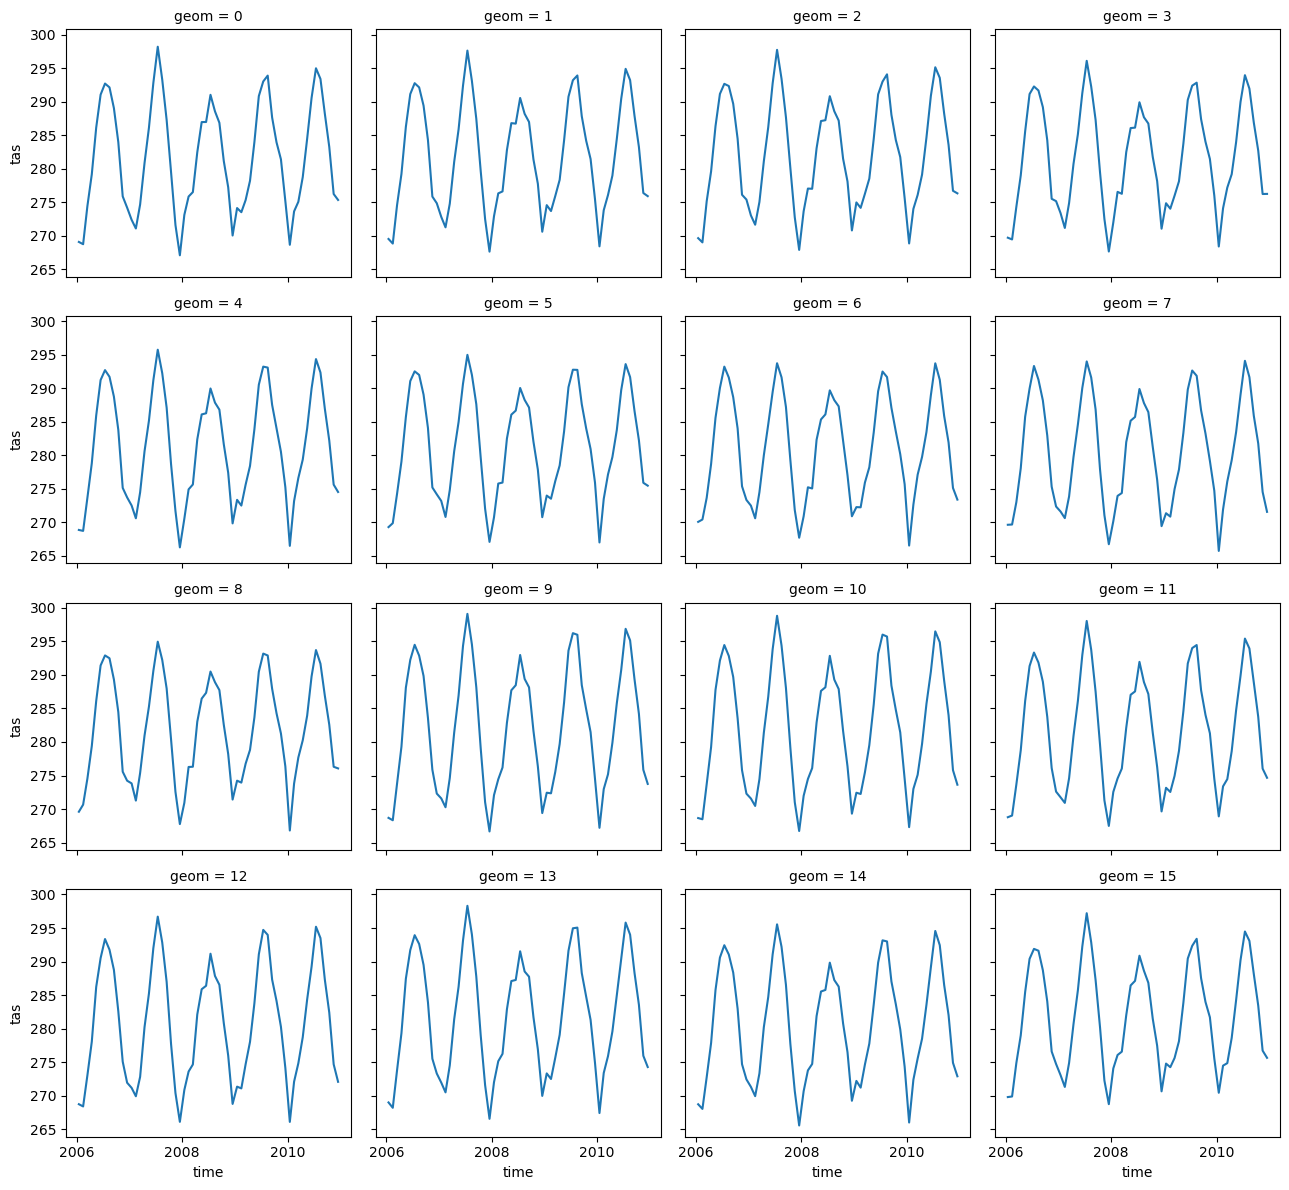

In [19]:
out_bdl["tas"].plot(col="geom", col_wrap=4)

In [20]:
out_nsc = xw.spatial_averaging(ds, nsc)
out_nsc

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


<xarray.Dataset>
Dimensions:       (time: 60, geom: 1, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 2.0
    lon           (geom) float64 9.33
    lat           (geom) float64 53.14
  * geom          (geom) int64 0
    all           (geom) object 'NothSeaCoast'
    nnz           (geom) int64 545
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 269.6 269.1 274.6 ... 283.3 276.5 275.8
    lon_vertices  (vertices, geom) float64 9.25 9.272 9.453 9.432
    lat_vertices  (vertices, geom) float64 53.06 52.95 52.96 53.07
Attributes:
    regrid_method:  conservative

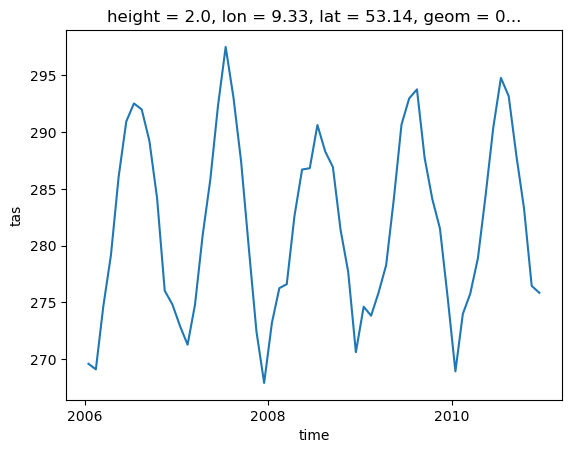

In [21]:
out_nsc.tas.plot()

Ok, that's not pretty exciting I know :/

## 5) Consider land points only 

With xesmf it is very easy to consider land points only. You just have to add a land-sea mask to the xarray Dataset. xesmf automatically considers the mask whil calculating spatial averages.

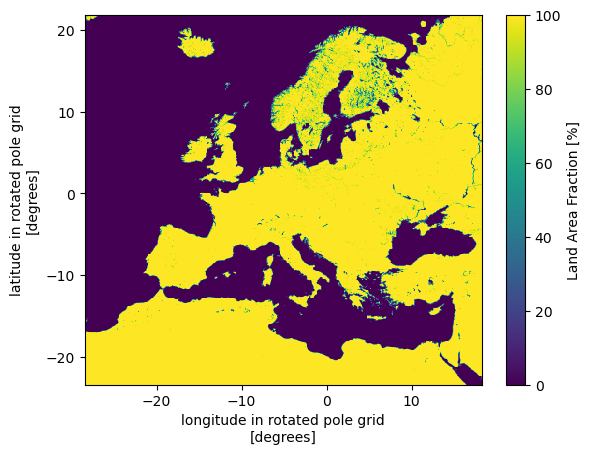

In [22]:
import xarray as xr

lsmfile = "sftlf_EUR-11_MIROC-MIROC5_rcp85_r0i0p0_CLMcom-CCLM4-8-17_v1_fx.nc"
lsm = xr.open_dataset(lsmfile)
lsm["sftlf"].plot()

We need to normalize the land-sea mask to the values 0 ant 1.

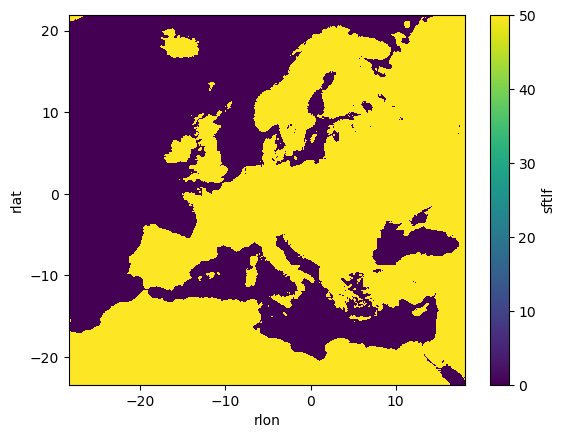

In [23]:
import numpy as np

lsm_norm = xr.where(lsm["sftlf"] > 0, 50, 0)
lsm_norm.plot()

Now, let's add this mask to our dataset. And calculat for the PRUDENCE regions.

In [24]:
ds_lsm = ds.copy()
ds_lsm["mask"] = lsm_norm

In [25]:
prudence = xw.get_region("prudence")

In [26]:
out_prudence = xw.spatial_averaging(ds, prudence)
out_prudence_lsm = xw.spatial_averaging(ds_lsm, prudence)
out_prudence_lsm

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


<xarray.Dataset>
Dimensions:       (time: 60, geom: 10, vertices: 4)
Coordinates:
  * time          (time) object 2006-01-16 12:00:00 ... 2010-12-16 12:00:00
    height        float64 2.0
    lon           (geom) float64 -3.5 -0.0 9.0 10.0 14.0 23.0 1.0 34.0 17.5 -4.0
    lat           (geom) float64 40.0 47.0 51.5 46.0 ... 30.5 33.5 62.5 54.5
  * geom          (geom) int64 0 1 2 3 4 5 6 7 8 9
    name          (geom) object 'Iberian Peninsula' 'France' ... 'British Isles'
    nnz           (geom) int64 4653 2520 4294 2219 ... 15975 11714 10162 2580
Dimensions without coordinates: vertices
Data variables:
    tas           (time, geom) float32 277.9 273.7 269.8 ... 283.0 268.3 278.9
    lon_vertices  (vertices, geom) float64 -3.748 1.179 9.52 ... 19.29 -3.979
    lat_vertices  (vertices, geom) float64 40.39 47.06 51.02 ... 62.11 53.94
    mask          (geom) int64 49 50 49 49 50 50 50 49 49 49
Attributes:
    regrid_method:  conservative

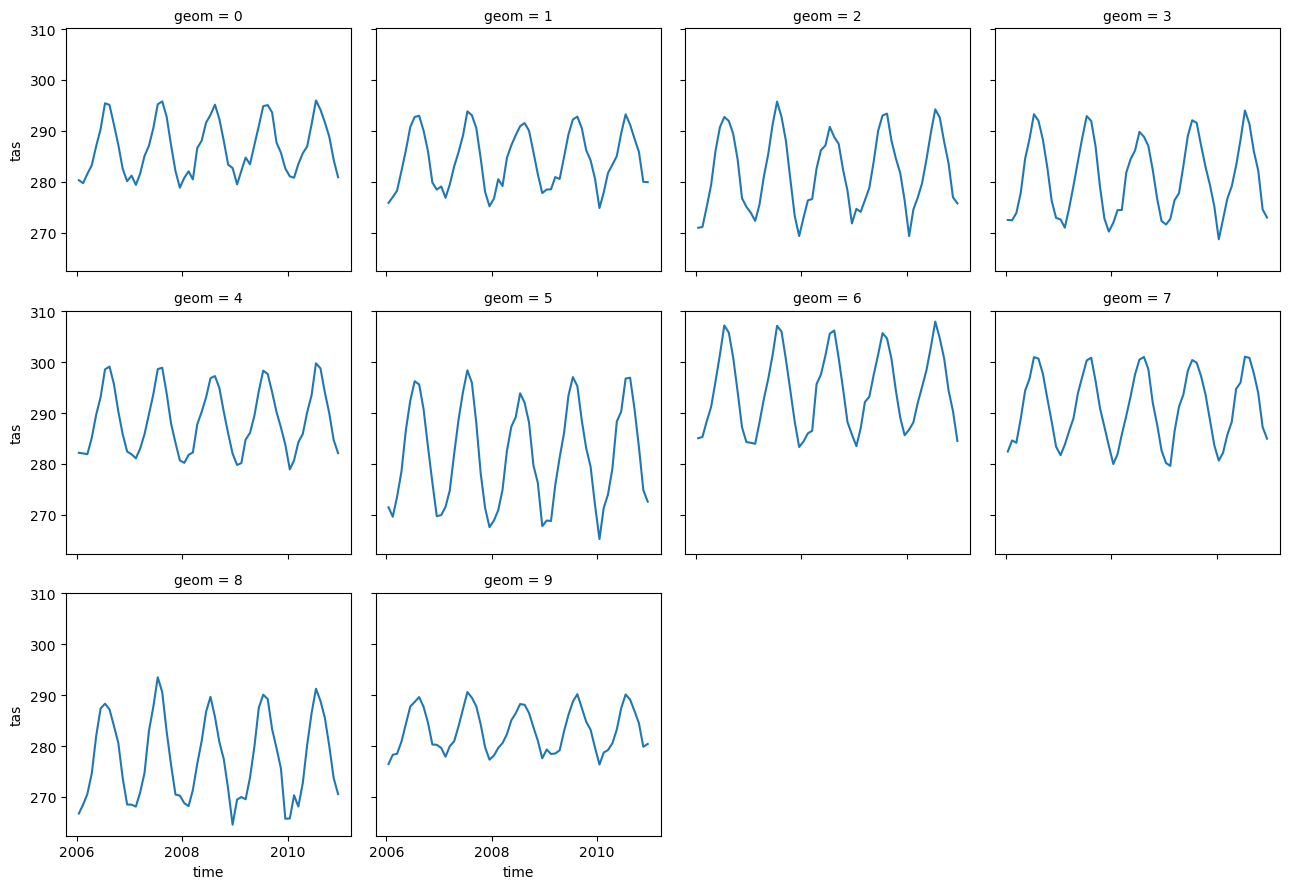

In [27]:
out_prudence["tas"].plot(col="geom", col_wrap=4)

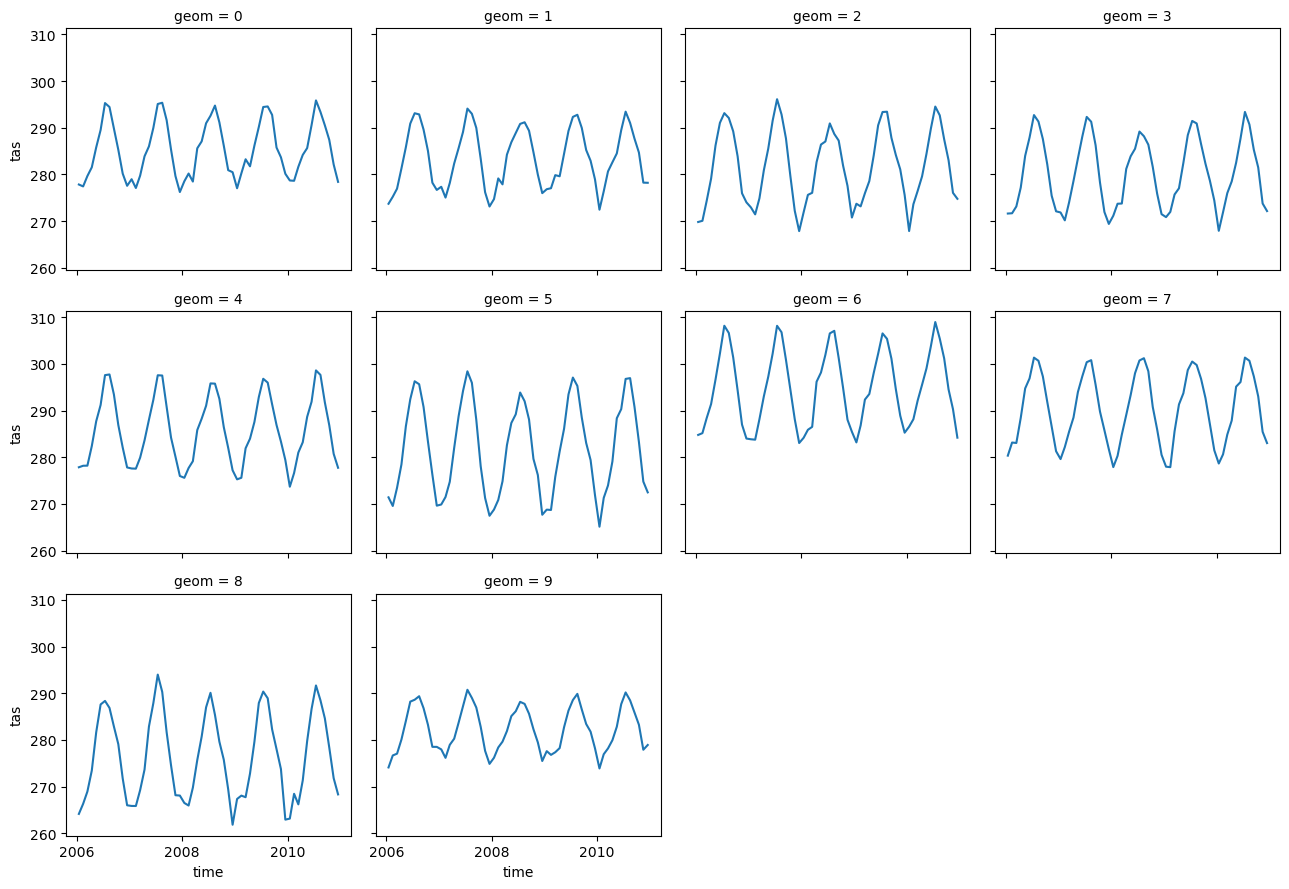

In [28]:
out_prudence_lsm["tas"].plot(col="geom", col_wrap=4)

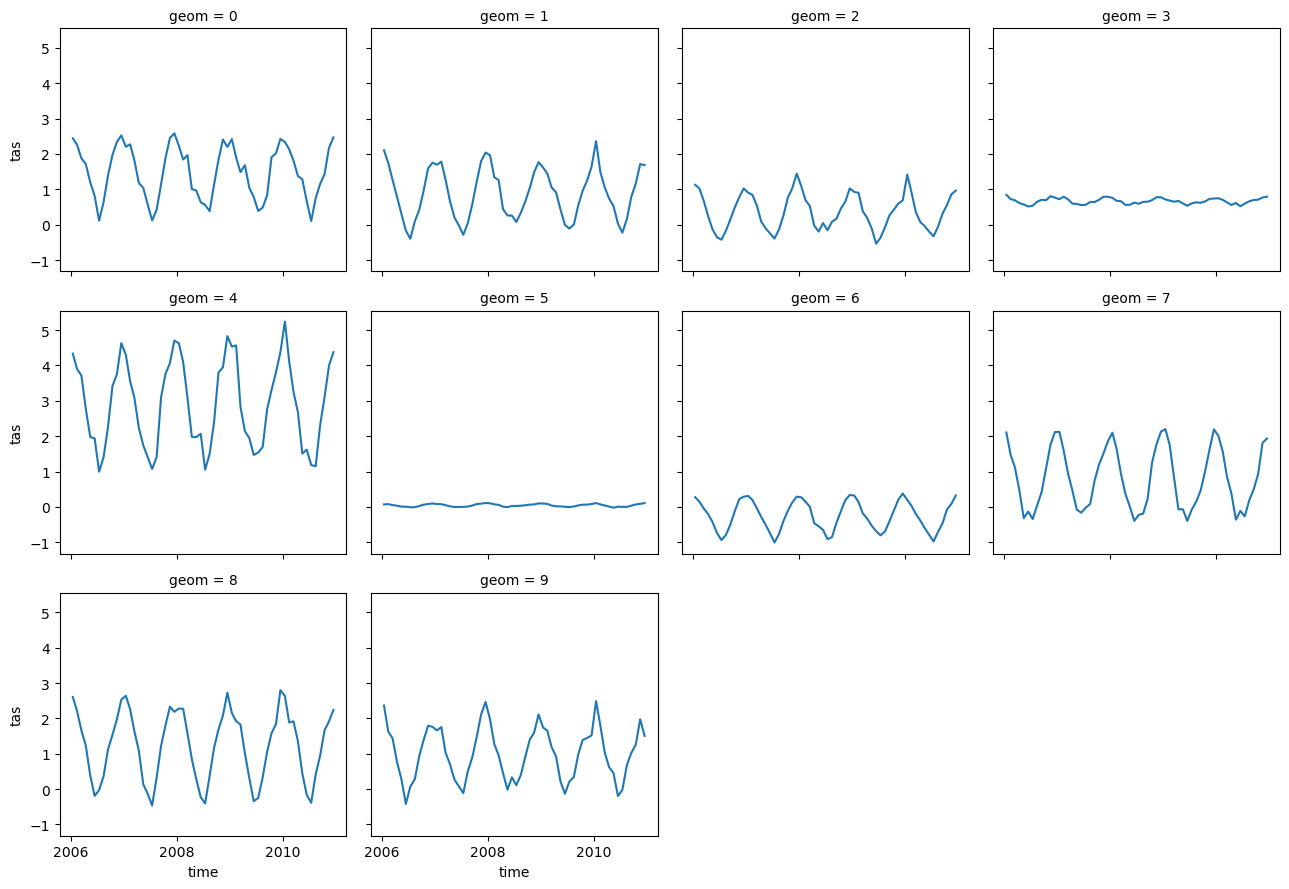

In [29]:
(out_prudence["tas"] - out_prudence_lsm["tas"]).plot(col="geom", col_wrap=4)

## 6) Save results to pandas DataFrame

We can simplify the above steps and use a new the function. The result will be written to a pandas DataFrame. 

In [30]:
df = xw.compute_weighted_means_ds(ds, region="prudence")
df

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


lon   lat     name    nnz         tas
time                geom                                        
2006-01-16 12:00:00 0     -3.5  40.0  dataset   6851  280.295959
                    1     -0.0  47.0  dataset   3522  275.831696
                    2      9.0  51.5  dataset   5178  270.945007
                    3     10.0  46.0  dataset   2407  272.476959
                    4     14.0  40.0  dataset  11536  282.176697
...                        ...   ...      ...    ...         ...
2010-12-16 12:00:00 5     23.0  49.5  dataset   8438  272.571228
                    6      1.0  30.5  dataset  17355  284.503082
                    7     34.0  33.5  dataset  16573  284.956726
                    8     17.5  62.5  dataset  14566  270.559143
                    9     -4.0  54.5  dataset   5375  280.417755

[600 rows x 5 columns]

Let's use some paramters to adjust the DataFrame.

In [31]:
df = xw.compute_weighted_means_ds(
    ds,
    region="prudence",
    ds_name="tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM4-8-17_v1_mon",
    column_names=[
        "institute_id",
        "driving_model_id",
        "experiment_id",
        "driving_model_ensemble_member",
        "model_id",
        "rcm_version_id",
        "standard_name",
        "units",
    ],
)
df

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


lon   lat  \
time                geom               
2006-01-16 12:00:00 0     -3.5  40.0   
                    1     -0.0  47.0   
                    2      9.0  51.5   
                    3     10.0  46.0   
                    4     14.0  40.0   
...                        ...   ...   
2010-12-16 12:00:00 5     23.0  49.5   
                    6      1.0  30.5   
                    7     34.0  33.5   
                    8     17.5  62.5   
                    9     -4.0  54.5   

                                                                       name  \
time                geom                                                      
2006-01-16 12:00:00 0     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    1     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    2     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    3     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    4     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
...                                                                     ...   
2010-12-16 12:00:00 5     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    6     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    7     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    8     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    9     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   

                            nnz         tas institute_id driving_model_id  \
time                geom                                                    
2006-01-16 12:00:00 0      6851  280.295959       CLMcom     MIROC-MIROC5   
                    1      3522  275.831696       CLMcom     MIROC-MIROC5   
                    2      5178  270.945007       CLMcom     MIROC-MIROC5   
                    3      2407  272.476959       CLMcom     MIROC-MIROC5   
                    4     11536  282.176697       CLMcom     MIROC-MIROC5   
...                         ...         ...          ...              ...   
2010-12-16 12:00:00 5      8438  272.571228       CLMcom     MIROC-MIROC5   
                    6     17355  284.503082       CLMcom     MIROC-MIROC5   
                    7     16573  284.956726       CLMcom     MIROC-MIROC5   
                    8     14566  270.559143       CLMcom     MIROC-MIROC5   
                    9      5375  280.417755       CLMcom     MIROC-MIROC5   

                         experiment_id driving_model_ensemble_member  \
time                geom                                               
2006-01-16 12:00:00 0            rcp85                        r1i1p1   
                    1            rcp85                        r1i1p1   
                    2            rcp85                        r1i1p1   
                    3            rcp85                        r1i1p1   
                    4            rcp85                        r1i1p1   
...                                ...                           ...   
2010-12-16 12:00:00 5            rcp85                        r1i1p1   
                    6            rcp85                        r1i1p1   
                    7            rcp85                        r1i1p1   
                    8            rcp85                        r1i1p1   
                    9            rcp85                        r1i1p1   

                                   model_id rcm_version_id    standard_name  \
time                geom                                                      
2006-01-16 12:00:00 0     CLMcom-CCLM4-8-17             v1  air_temperature   
                    1     CLMcom-CCLM4-8-17             v1  air_temperature   
                    2     CLMcom-CCLM4-8-17             v1  air_temperature   
                    3     CLMcom-CCLM4-8-17             v1  air_temperature   
                    4     CLMcom-CCLM4-8-17             v1  air_t

Now, with a pandas DataFrame feel free to do a lots of statistics :)

Set the parameter ``output`` to a file name and save the DataFrame on disk. 

## 7) All in one

Besides ``xw.compute_weighted_means_ds`` there is another function called ``xw.compute_weighted_means``. This function combines all above steps to one.

In [32]:
df = xw.compute_weighted_means(
    dataset_dict,
    region="prudence",
    column_names=[
        "institute_id",
        "driving_model_id",
        "experiment_id",
        "driving_model_ensemble_member",
        "model_id",
        "rcm_version_id",
        "standard_name",
        "units",
    ],
)
df

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/xesmf/smm.py:130: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


lon   lat  \
time                geom               
2006-01-16 12:00:00 0     -3.5  40.0   
                    1     -0.0  47.0   
                    2      9.0  51.5   
                    3     10.0  46.0   
                    4     14.0  40.0   
...                        ...   ...   
2010-12-16 12:00:00 5     23.0  49.5   
                    6      1.0  30.5   
                    7     34.0  33.5   
                    8     17.5  62.5   
                    9     -4.0  54.5   

                                                                       name  \
time                geom                                                      
2006-01-16 12:00:00 0     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    1     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    2     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    3     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    4     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
...                                                                     ...   
2010-12-16 12:00:00 5     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    6     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    7     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    8     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   
                    9     tas_EUR-11_MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CC...   

                            nnz         tas institute_id driving_model_id  \
time                geom                                                    
2006-01-16 12:00:00 0      6851  280.295959       CLMcom     MIROC-MIROC5   
                    1      3522  275.831696       CLMcom     MIROC-MIROC5   
                    2      5178  270.945007       CLMcom     MIROC-MIROC5   
                    3      2407  272.476959       CLMcom     MIROC-MIROC5   
                    4     11536  282.176697       CLMcom     MIROC-MIROC5   
...                         ...         ...          ...              ...   
2010-12-16 12:00:00 5      8438  272.571228       CLMcom     MIROC-MIROC5   
                    6     17355  284.503082       CLMcom     MIROC-MIROC5   
                    7     16573  284.956726       CLMcom     MIROC-MIROC5   
                    8     14566  270.559143       CLMcom     MIROC-MIROC5   
                    9      5375  280.417755       CLMcom     MIROC-MIROC5   

                         experiment_id driving_model_ensemble_member  \
time                geom                                               
2006-01-16 12:00:00 0            rcp85                        r1i1p1   
                    1            rcp85                        r1i1p1   
                    2            rcp85                        r1i1p1   
                    3            rcp85                        r1i1p1   
                    4            rcp85                        r1i1p1   
...                                ...                           ...   
2010-12-16 12:00:00 5            rcp85                        r1i1p1   
                    6            rcp85                        r1i1p1   
                    7            rcp85                        r1i1p1   
                    8            rcp85                        r1i1p1   
                    9            rcp85                        r1i1p1   

                                   model_id rcm_version_id    standard_name  \
time                geom                                                      
2006-01-16 12:00:00 0     CLMcom-CCLM4-8-17             v1  air_temperature   
                    1     CLMcom-CCLM4-8-17             v1  air_temperature   
                    2     CLMcom-CCLM4-8-17             v1  air_temperature   
                    3     CLMcom-CCLM4-8-17             v1  air_temperature   
                    4     CLMcom-CCLM4-8-17             v1  air_t

As mentioned above, if you have enough computational ressources you can use an intake-esm catalogue file as input instead of one single netCDF file.